male: Gender of the patient (1 = male; 0 = female).
age: Age of the patient.
education: Education level (1-4, where 1 is the lowest and 4 is the highest).
currentSmoker: Whether the patient is a current smoker (1 = yes; 0 = no).
cigsPerDay: Number of cigarettes smoked per day.
BPMeds: Whether the patient is on blood pressure medication (1 = yes; 0 = no).
prevalentStroke: Whether the patient has previously had a stroke (1 = yes; 0 = no).
prevalentHyp: Whether the patient has hypertension (1 = yes; 0 = no).
diabetes: Whether the patient has diabetes (1 = yes; 0 = no).
totChol: Total cholesterol level.
sysBP: Systolic blood pressure.
diaBP: Diastolic blood pressure.
BMI: Body mass index.
heartRate: Heart rate.
glucose: Glucose level.
TenYearCHD: 10-year risk of coronary heart disease (1 = yes; 0 = no).

Preprocessing

Handling missing values
Encoding categorical variables if any
Normalizing or standardizing the data if necessary

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


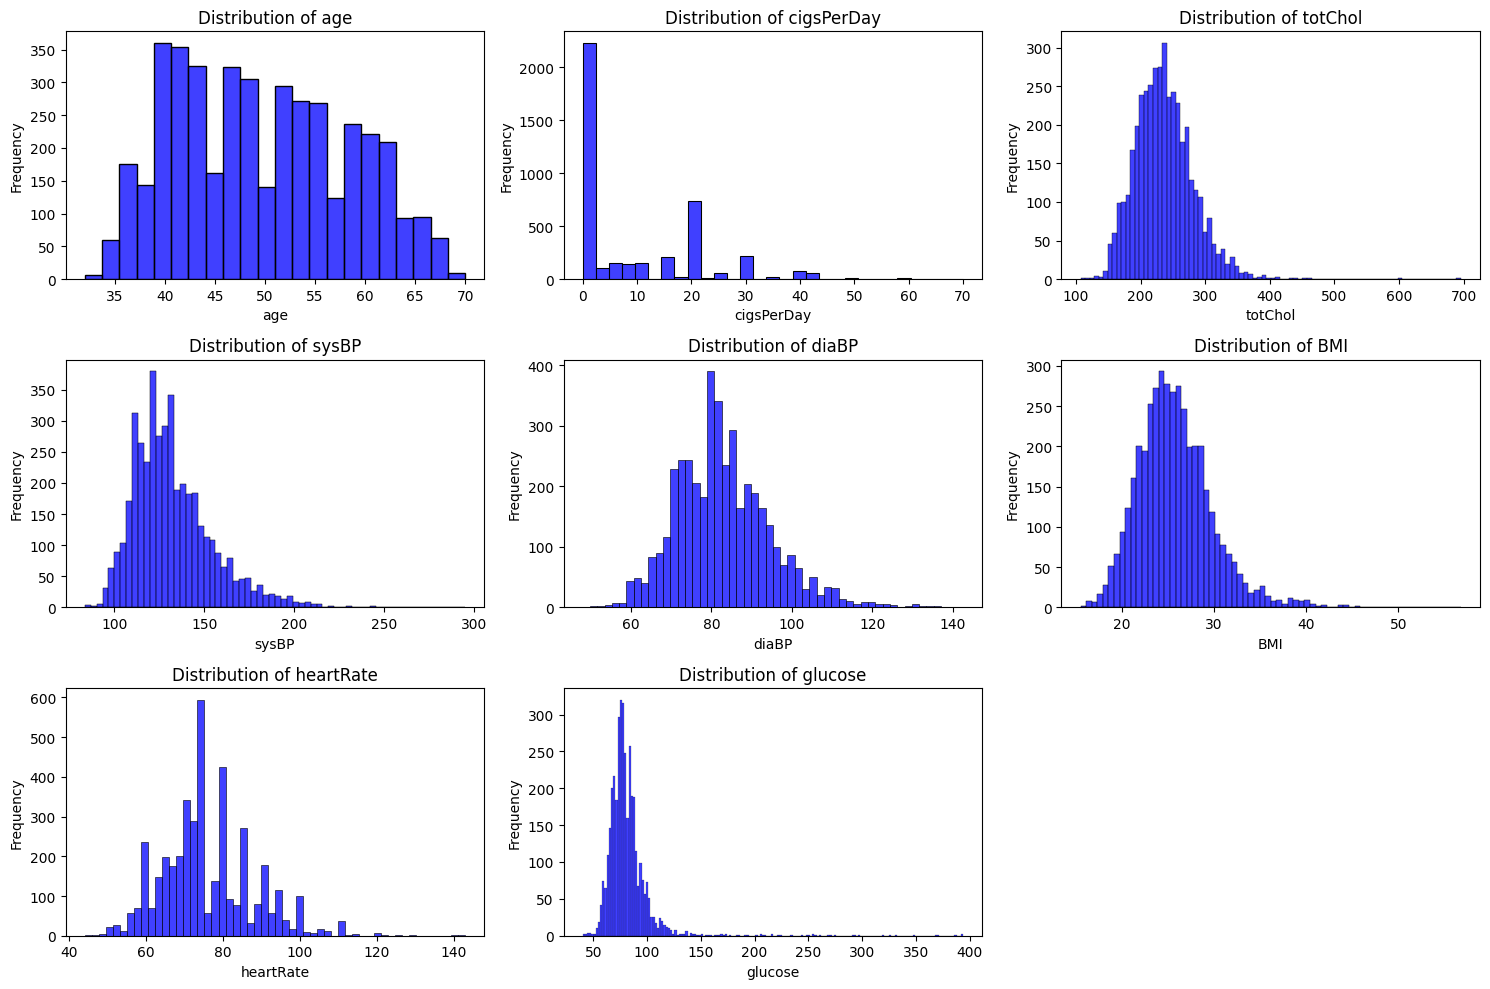

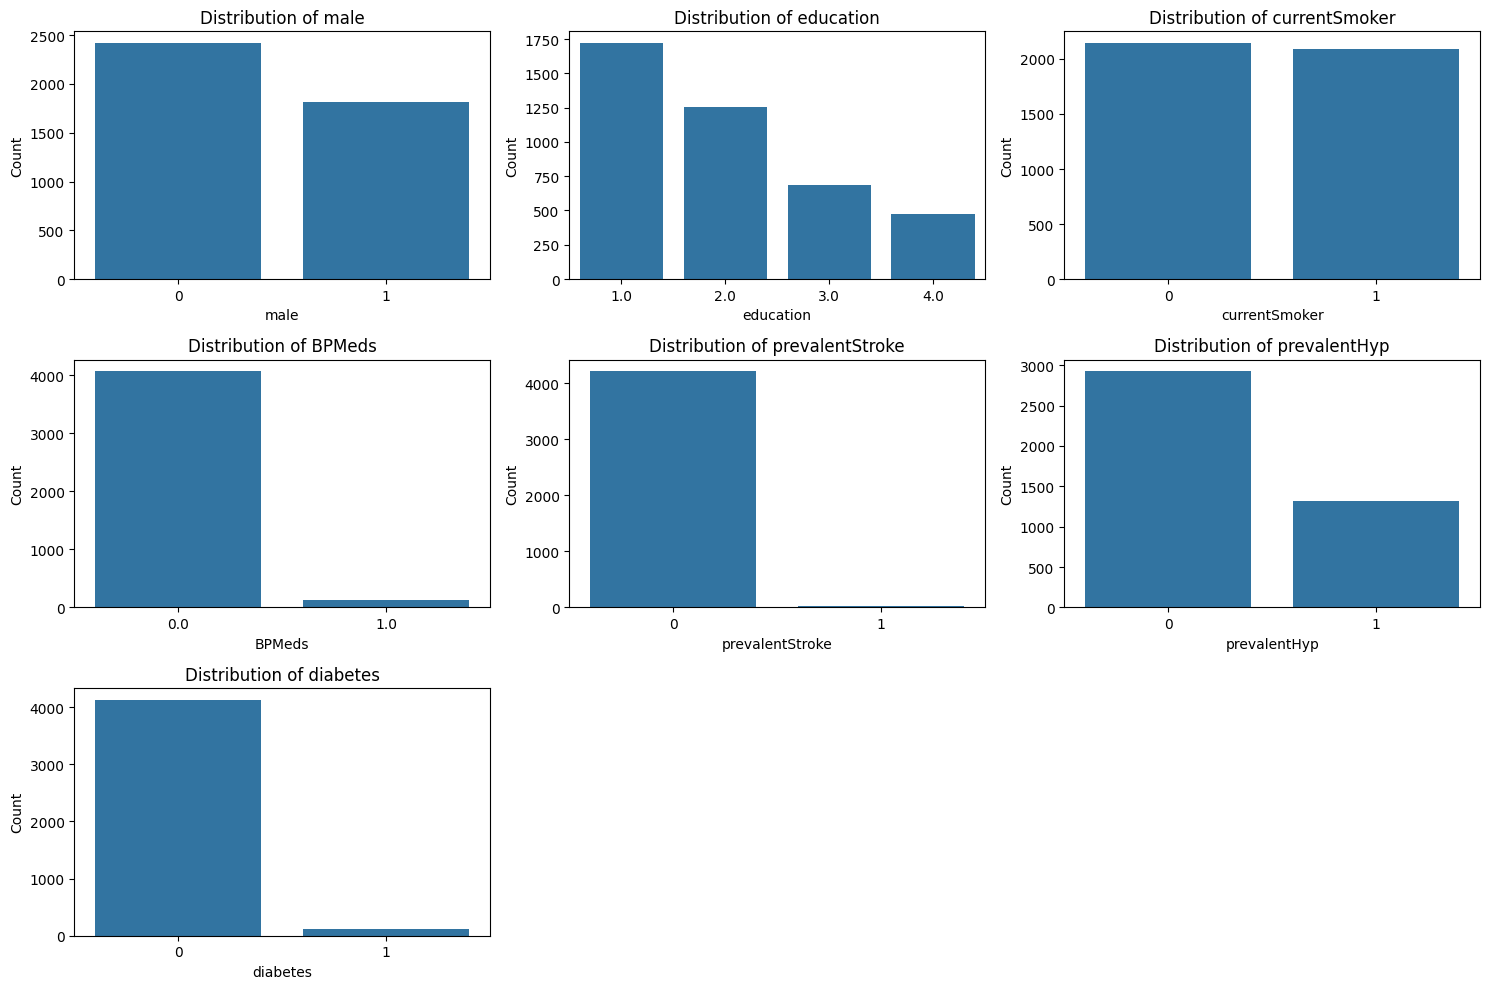

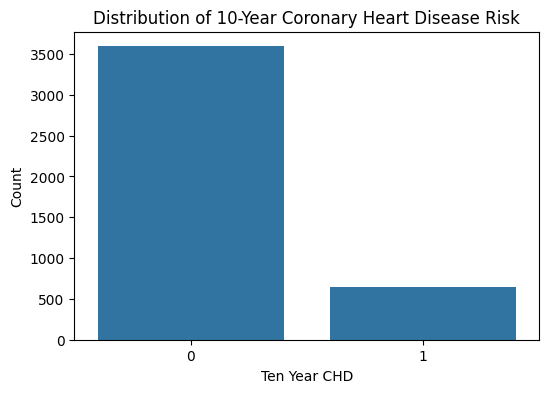

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'framingham.csv'
data = pd.read_csv(file_path)

display(data.describe())

# Define numerical features
numerical_features = ['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']

# Create histograms for numerical features
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features):
    plt.subplot(3, 3, i + 1)  # Adjust the grid parameters based on the number of features
    sns.histplot(data[feature], kde=False, color='blue')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Define categorical features
categorical_features = ['male', 'education', 'currentSmoker', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']

# Create bar plots for categorical features
plt.figure(figsize=(15, 10))
for i, feature in enumerate(categorical_features):
    plt.subplot(3, 3, i + 1)  # Adjust the grid parameters based on the number of features
    sns.countplot(x=data[feature])
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

# Plot for the prediction variable (TenYearCHD
plt.figure(figsize=(6, 4))
sns.countplot(x=data['TenYearCHD'])
plt.title('Distribution of 10-Year Coronary Heart Disease Risk')
plt.xlabel('Ten Year CHD')
plt.ylabel('Count')
plt.show()


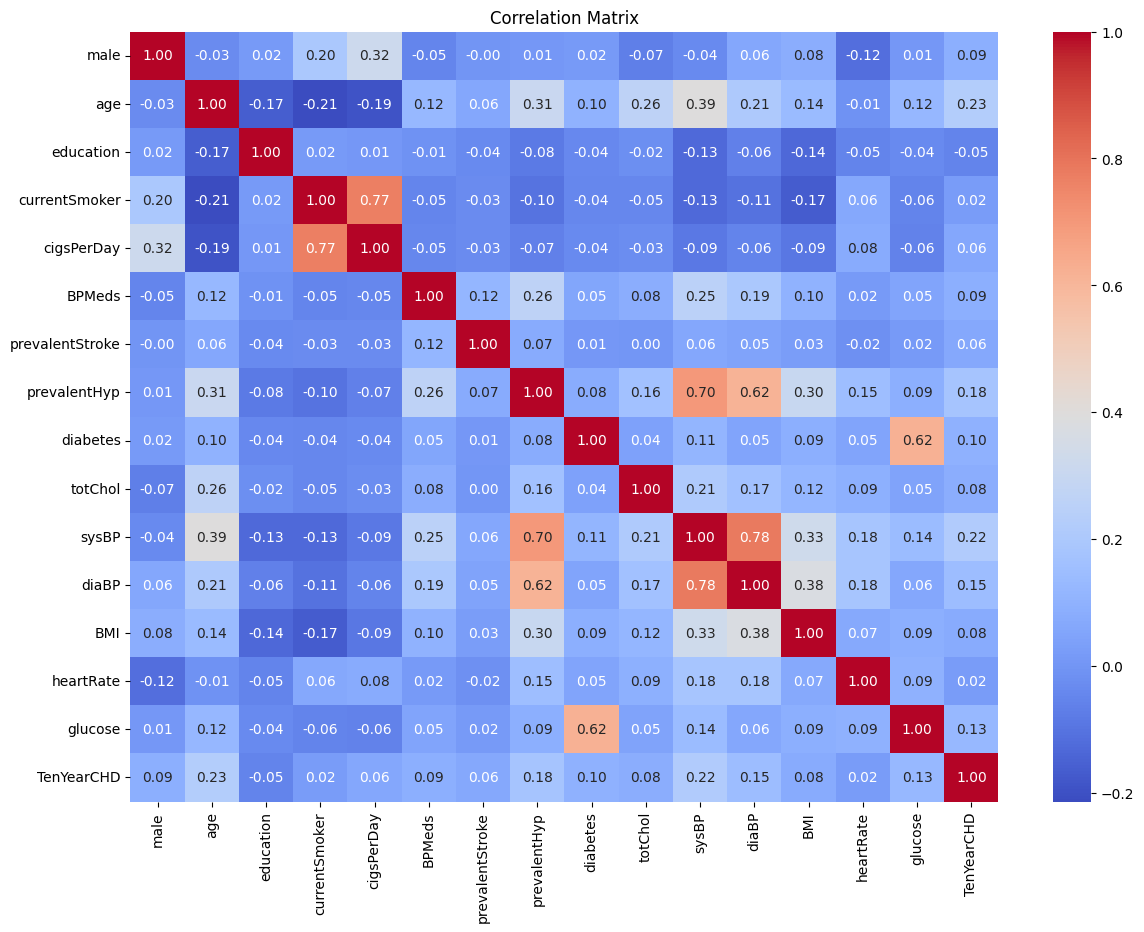

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Correlation Matrix
plt.figure(figsize=(14, 10))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Correlation Matrix')
plt.show()


### Key Observations from the Correlation Matrix:

1. **Smoking Variables**:
   - `currentSmoker` and `cigsPerDay` show a strong positive correlation (0.77). This is expected as `currentSmoker` likely indicates whether someone smokes, and `cigsPerDay` quantifies how much they smoke.
   - Both smoking variables (`currentSmoker` and `cigsPerDay`) have moderate to strong correlations with being male (0.20 for `currentSmoker`, 0.32 for `cigsPerDay`). This might suggest that smoking is more prevalent or reported more among males in your dataset.

2. **Blood Pressure**:
   - `sysBP` (systolic blood pressure) and `diaBP` (diastolic blood pressure) are highly correlated (0.78), which is typical as both measurements are aspects of blood pressure.
   - `prevalentHyp` (prevalence of hypertension) shows significant correlations with both `sysBP` (0.70) and `diaBP` (0.62), indicating that higher blood pressure measurements are associated with hypertension diagnosis.

3. **Cholesterol and Glucose**:
   - `totChol` (total cholesterol) and `sysBP` have a mild correlation (0.21), suggesting a possible link between cholesterol levels and higher blood pressure.
   - `glucose` shows moderate correlation with diabetes (0.62), which aligns with medical knowledge as higher glucose levels are a marker for diabetes.

4. **Demographics**:
   - `age` shows positive correlations with `sysBP` (0.39), `prevalentHyp` (0.31), and `diabetes` (0.26), indicating that these health issues are more prevalent as age increases.

5. **Medications and Health Conditions**:
   - `BPMeds` (blood pressure medications) has correlations with `prevalentHyp` (0.26) and `sysBP` (0.25), supporting the understanding that those with higher blood pressure or diagnosed hypertension are more likely to be on medication.
   - `prevalentStroke` and `BPMeds` have a mild correlation (0.12), which may indicate that those with a history of stroke might be more frequently on blood pressure medication, although this correlation is not very strong.

6. **Outcome Variable (TenYearCHD)**:
   - The prediction variable `TenYearCHD` shows some mild correlations with `age` (0.23), `sysBP` (0.22), `diaBP` (0.15), and `prevalentHyp` (0.18). These correlations suggest that older age and higher blood pressure are associated with a greater risk of coronary heart disease within the next ten years.
   - Notably, there are no very strong correlations between `TenYearCHD` and any single variable, indicating that the risk of coronary heart disease is likely influenced by a combination of factors.

### Implications and Next Steps:

What we could consider are these steps for further analysis:
- **Multifactorial Analysis**: Since `TenYearCHD` does not strongly correlate with a single variable, using multifactorial models like logistic regression or machine learning algorithms that can handle multiple inputs might be more effective.
- **Focus on High-Correlation Variables**: In predictive modeling, focus on variables with stronger correlations to the outcome, like `sysBP`, `age`, and `prevalentHyp`, as they might be more predictive.
- **Check for Multicollinearity**: When building models, be cautious of multicollinearity, especially between variables like `sysBP` and `diaBP`.

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Define features and target
print("Data before preprocessing:")
X = data.drop(columns=['TenYearCHD'])
y = data['TenYearCHD']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

display(X_train.head())
display(X_test.head())

# Define preprocessing for numerical columns (imputation + scaling)
numerical_features = ['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Fill missing values with mean
    ('scaler', StandardScaler())  # Standardize numerical features
])

# Define preprocessing for categorical columns (imputation + one-hot encoding)
categorical_features = ['male', 'education', 'currentSmoker', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Fill missing values with most frequent value
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot encode categorical features
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Fit and transform the training data, transform the test data
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)
# Preprocess all the data for later visualization purposes
X_preprocessed = preprocessor.transform(X)

# Optionally, you can convert the processed data back to a DataFrame for easier interpretation
# Get feature names after one-hot encoding
feature_names = numerical_features + list(preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_features))
X_train = pd.DataFrame(X_train, columns=feature_names)
X_test = pd.DataFrame(X_test, columns=feature_names)

# Check the preprocessed training data
print("Data after preprocessing:")
display(X_train.head())
display(X_test.head())


Data before preprocessing:


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
3252,1,40,4.0,1,30.0,0.0,0,0,0,205.0,131.0,81.0,23.74,66.0,87.0
3946,0,57,2.0,0,0.0,0.0,0,1,0,250.0,152.5,92.5,32.31,75.0,94.0
1261,0,47,1.0,0,0.0,0.0,0,0,0,230.0,123.0,71.0,26.98,83.0,73.0
2536,1,41,2.0,1,30.0,0.0,0,0,0,228.0,113.0,82.5,25.67,67.0,70.0
4089,0,64,1.0,0,0.0,0.0,0,1,0,232.0,149.5,84.0,20.49,68.0,96.0


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
3188,1,63,1.0,0,0.0,0.0,0,1,0,190.0,148.0,90.0,27.13,72.0,86.0
764,1,45,3.0,0,0.0,0.0,0,0,0,162.0,125.0,89.0,27.98,85.0,83.0
3264,0,51,1.0,1,2.0,0.0,0,0,0,261.0,127.0,81.0,20.24,75.0,96.0
1967,1,45,3.0,1,30.0,0.0,0,0,0,250.0,126.0,89.5,28.68,75.0,92.0
2185,0,45,2.0,1,3.0,0.0,0,0,0,250.0,130.0,80.0,20.24,90.0,86.0


Data after preprocessing:


,age,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose,male_0.0,male_1.0,...,currentSmoker_0.0,currentSmoker_1.0,BPMeds_0.0,BPMeds_1.0,prevalentStroke_0.0,prevalentStroke_1.0,prevalentHyp_0.0,prevalentHyp_1.0,diabetes_0.0,diabetes_1.0
0,-1.110334,1.762585,-0.716699,-0.062841,-0.165921,-0.511018,-0.837799,0.221112,0.0,1.0,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,0.871963,-0.762431,0.295059,0.909287,0.795214,1.575841,-0.083446,0.530608,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
2,-0.294094,-0.762431,-0.154611,-0.424563,-1.001691,0.277946,0.587090,-0.397881,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,-0.993728,1.762585,-0.199578,-0.876716,-0.040556,-0.041049,-0.753982,-0.530522,0.0,1.0,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,1.688203,-0.762431,-0.109644,0.773641,0.084810,-1.302417,-0.670165,0.619036,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0


,age,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose,male_0.0,male_1.0,...,currentSmoker_0.0,currentSmoker_1.0,BPMeds_0.0,BPMeds_1.0,prevalentStroke_0.0,prevalentStroke_1.0,prevalentHyp_0.0,prevalentHyp_1.0,diabetes_0.0,diabetes_1.0
0,1.571597,-0.762431,-1.053951,0.705818,0.586272,0.314472,-0.334897,0.176898,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
1,-0.527305,-0.762431,-1.683490,-0.334133,0.502695,0.521454,0.754724,0.044257,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,0.172329,-0.594096,0.542378,-0.243702,-0.165921,-1.363294,-0.083446,0.619036,1.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,-0.527305,1.762585,0.295059,-0.288918,0.544483,0.691909,-0.083446,0.442181,0.0,1.0,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,-0.527305,-0.509929,0.295059,-0.108057,-0.249498,-1.363294,1.173808,0.176898,1.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


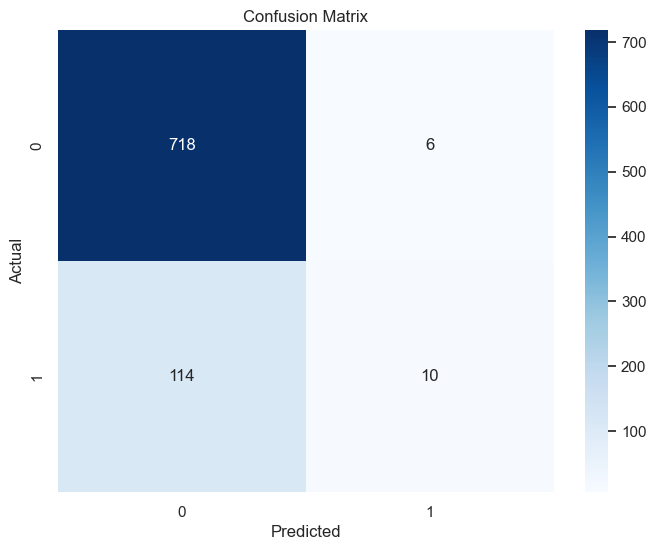

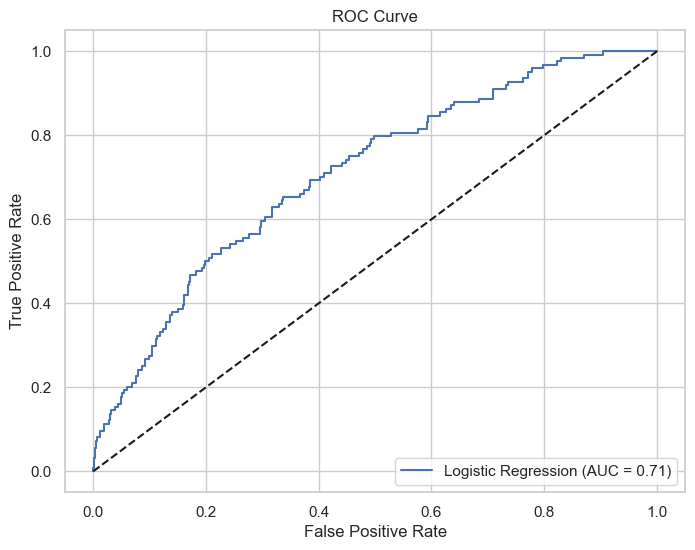

(0.8584905660377359,
 array([[718,   6],
        [114,  10]], dtype=int64),
 '              precision    recall  f1-score   support\n\n           0       0.86      0.99      0.92       724\n           1       0.62      0.08      0.14       124\n\n    accuracy                           0.86       848\n   macro avg       0.74      0.54      0.53       848\nweighted avg       0.83      0.86      0.81       848\n')

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
import pandas as pd

# Model Selection: Logistic Regression
model = LogisticRegression()

# Training the model
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve and AUC Score
y_pred_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

accuracy, conf_matrix, class_report


Model Performance: The Logistic Regression model has an accuracy of 85.7%, but it struggles to detect the positive class (10-year CHD risk), as shown by the low recall and F1-score for this class.
Imbalance Issue: The dataset is imbalanced, with more negative cases (no CHD risk) than positive ones. This imbalance affects the model's performance on the positive class.

Model: Random Forest
Accuracy: 0.8537735849056604
Confusion Matrix:
[[714  10]
 [114  10]]
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       724
           1       0.50      0.08      0.14       124

    accuracy                           0.85       848
   macro avg       0.68      0.53      0.53       848
weighted avg       0.81      0.85      0.81       848

AUC Score: 0.6842808768490465



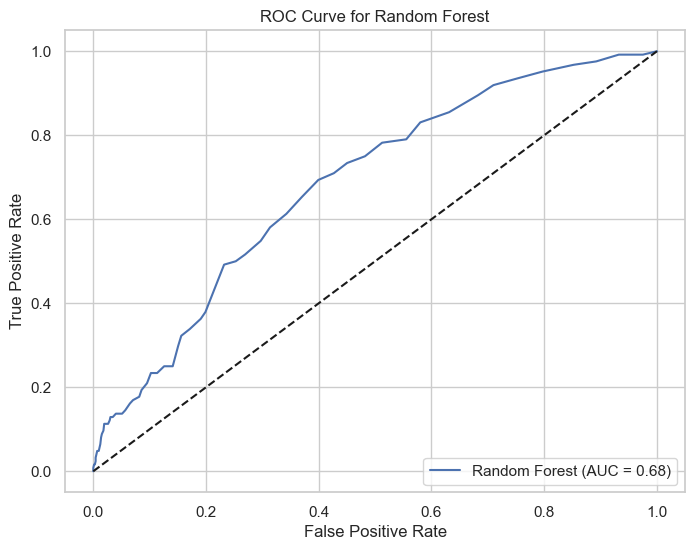

Model: Gradient Boosting
Accuracy: 0.8443396226415094
Confusion Matrix:
[[706  18]
 [114  10]]
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.98      0.91       724
           1       0.36      0.08      0.13       124

    accuracy                           0.84       848
   macro avg       0.61      0.53      0.52       848
weighted avg       0.79      0.84      0.80       848

AUC Score: 0.6907079843165211



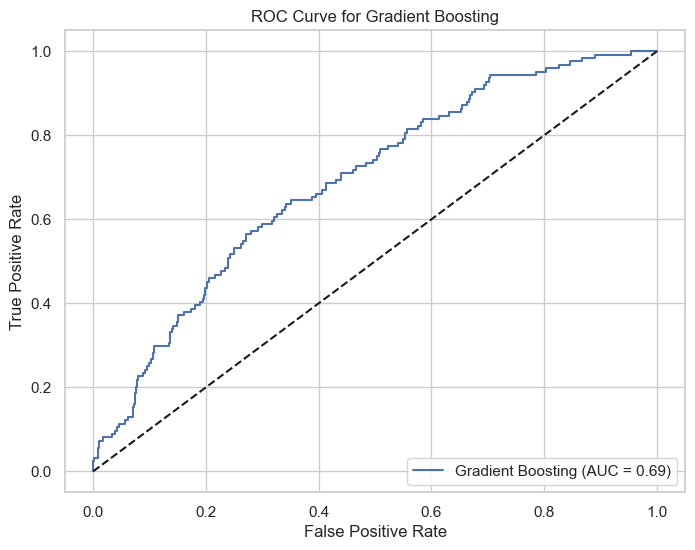

Model: Support Vector Machine
Accuracy: 0.8573113207547169
Confusion Matrix:
[[724   0]
 [121   3]]
Classification Report:
              precision    recall  f1-score   support

           0       0.86      1.00      0.92       724
           1       1.00      0.02      0.05       124

    accuracy                           0.86       848
   macro avg       0.93      0.51      0.49       848
weighted avg       0.88      0.86      0.79       848

AUC Score: 0.5964623061842809



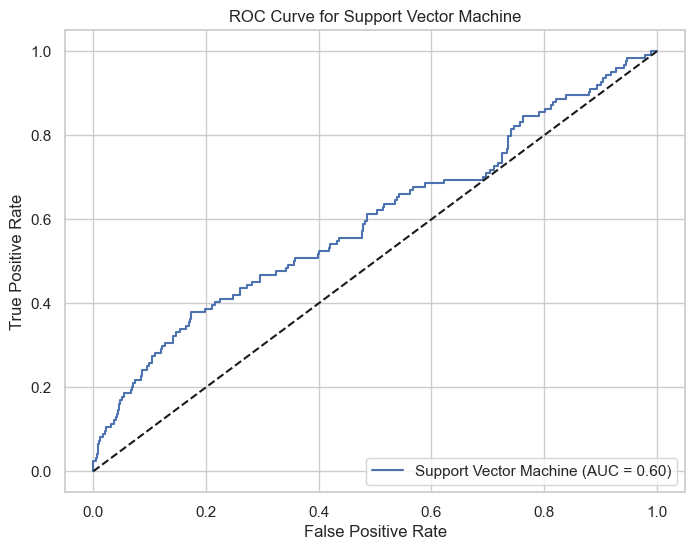

In [96]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Define the models
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Support Vector Machine": SVC(probability=True, random_state=42)
}

# Dictionary to store the results
results = {}

# Train and evaluate each model
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)
    
    # ROC Curve and AUC Score
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = roc_auc_score(y_test, y_pred_prob)
    
    results[model_name] = {
        "accuracy": accuracy,
        "conf_matrix": conf_matrix,
        "class_report": class_report,
        "roc_auc": roc_auc,
        "fpr": fpr,
        "tpr": tpr
    }

# Display the results
for model_name, result in results.items():
    print(f"Model: {model_name}")
    print(f"Accuracy: {result['accuracy']}")
    print(f"Confusion Matrix:\n{result['conf_matrix']}")
    print(f"Classification Report:\n{result['class_report']}")
    print(f"AUC Score: {result['roc_auc']}\n")
    
    # Plotting the ROC Curve
    plt.figure(figsize=(8, 6))
    plt.plot(result['fpr'], result['tpr'], label=f'{model_name} (AUC = {result["roc_auc"]:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {model_name}')
    plt.legend(loc='lower right')
    plt.show()

# Try oversampling because much of the data were false positives which is really bad for heart disseases

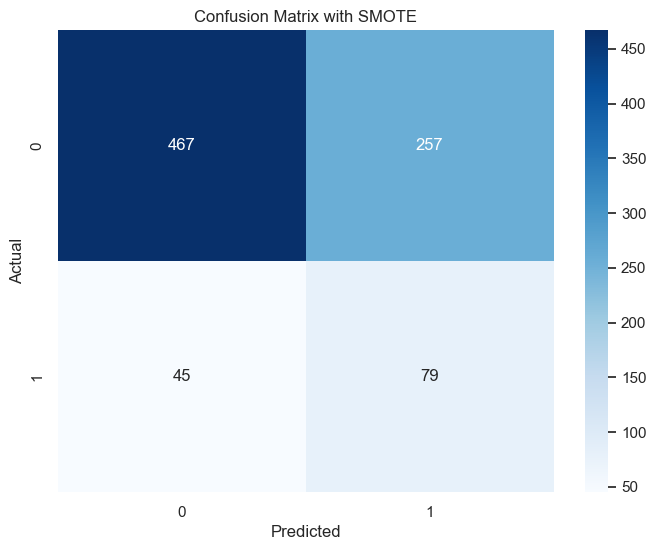

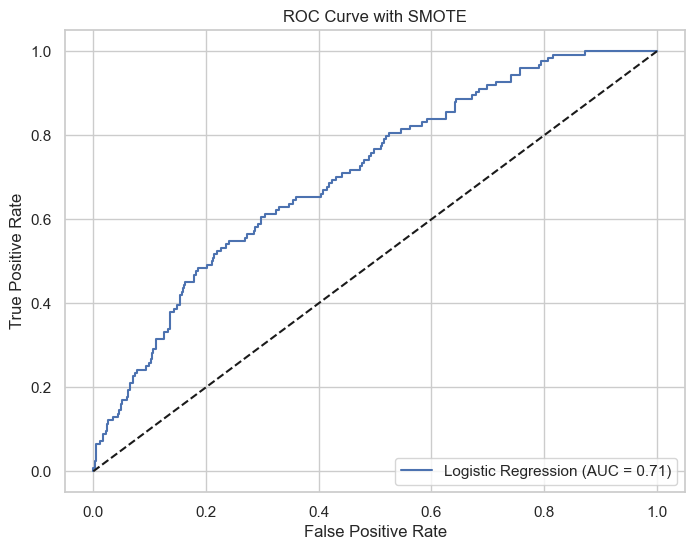

Accuracy: 0.6438679245283019
Confusion Matrix:
 [[467 257]
 [ 45  79]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.65      0.76       724
           1       0.24      0.64      0.34       124

    accuracy                           0.64       848
   macro avg       0.57      0.64      0.55       848
weighted avg       0.81      0.64      0.70       848



In [97]:
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression

# Applying SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Logistic Regression with class weights
model = LogisticRegression(class_weight='balanced', random_state=42)

# Training the model
model.fit(X_train_res, y_train_res)

# Making predictions
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix with SMOTE')
plt.show()

# ROC Curve and AUC Score
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with SMOTE')
plt.legend(loc='lower right')
plt.show()

print('Accuracy:', accuracy)
print('Confusion Matrix:\n', conf_matrix)
print('Classification Report:\n', class_report)


# Try oversampling for the models we already tried before

Model: Random Forest
Accuracy: 0.8148584905660378
Confusion Matrix:
[[668  56]
 [101  23]]
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.92      0.89       724
           1       0.29      0.19      0.23       124

    accuracy                           0.81       848
   macro avg       0.58      0.55      0.56       848
weighted avg       0.78      0.81      0.80       848

AUC Score: 0.6641028782748173



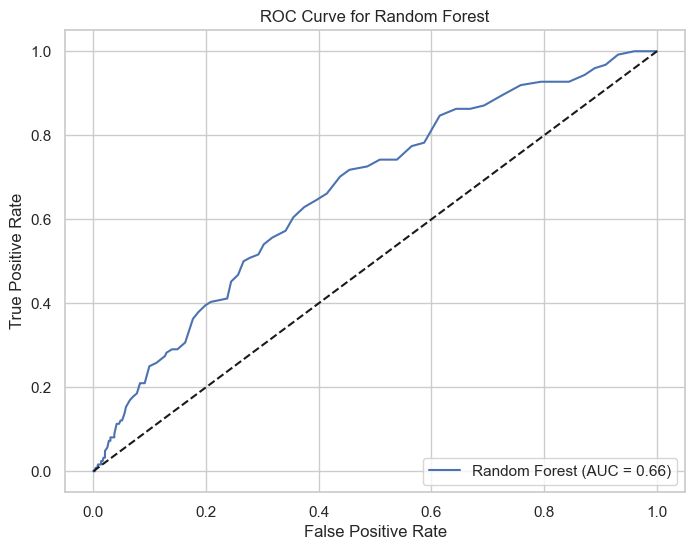

Model: Gradient Boosting
Accuracy: 0.7688679245283019
Confusion Matrix:
[[603 121]
 [ 75  49]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.83      0.86       724
           1       0.29      0.40      0.33       124

    accuracy                           0.77       848
   macro avg       0.59      0.61      0.60       848
weighted avg       0.80      0.77      0.78       848

AUC Score: 0.6975917839957226



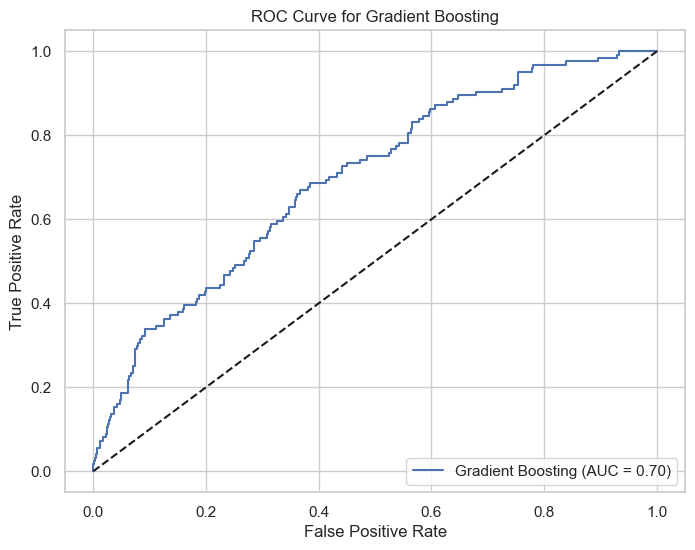

Model: Support Vector Machine
Accuracy: 0.6639150943396226
Confusion Matrix:
[[497 227]
 [ 58  66]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.69      0.78       724
           1       0.23      0.53      0.32       124

    accuracy                           0.66       848
   macro avg       0.56      0.61      0.55       848
weighted avg       0.80      0.66      0.71       848

AUC Score: 0.6615632240242382



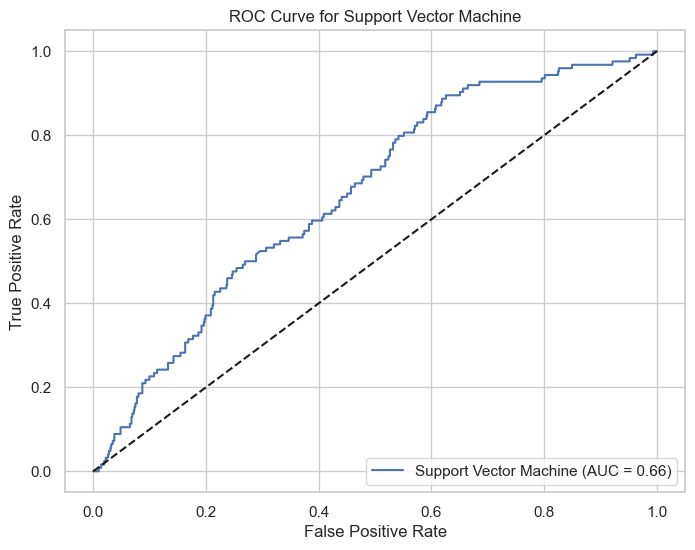

In [98]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Define the models
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Support Vector Machine": SVC(probability=True, random_state=42)
}

# Dictionary to store the results
results = {}

# Train and evaluate each model
for model_name, model in models.items():
    model.fit(X_train_res, y_train_res)
    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)
    
    # ROC Curve and AUC Score
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = roc_auc_score(y_test, y_pred_prob)
    
    results[model_name] = {
        "accuracy": accuracy,
        "conf_matrix": conf_matrix,
        "class_report": class_report,
        "roc_auc": roc_auc,
        "fpr": fpr,
        "tpr": tpr
    }

# Display the results
for model_name, result in results.items():
    print(f"Model: {model_name}")
    print(f"Accuracy: {result['accuracy']}")
    print(f"Confusion Matrix:\n{result['conf_matrix']}")
    print(f"Classification Report:\n{result['class_report']}")
    print(f"AUC Score: {result['roc_auc']}\n")
    
    # Plotting the ROC Curve
    plt.figure(figsize=(8, 6))
    plt.plot(result['fpr'], result['tpr'], label=f'{model_name} (AUC = {result["roc_auc"]:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {model_name}')
    plt.legend(loc='lower right')
    plt.show()


# Random forest seems to be the best, predict on a single data sample using that

In [99]:
import pandas as pd

# Sample row with raw data
sample_data = {
    'age': 50,
    'cigsPerDay': 20,
    'totChol': 220,
    'sysBP': 130,
    'diaBP': 85,
    'BMI': 28.0,
    'heartRate': 75,
    'glucose': 85,
    'male': 1,  # Assume 1 for male, 0 for female
    'education': 2,  # Example: 1 for high school, 2 for college, etc.
    'currentSmoker': 1,  # 1 if the person is a smoker
    'BPMeds': 0,  # 0 if not on blood pressure medication
    'prevalentStroke': 0,  # 0 if no history of stroke
    'prevalentHyp': 1,  # 1 if hypertensive
    'diabetes': 0  # 0 if not diabetic
}

# Convert the dictionary to DataFrame to match input structure of preprocessing pipeline
sample_df = pd.DataFrame([sample_data])

# Assuming 'preprocessor' is the ColumnTransformer you've previously set up
preprocessed_sample = preprocessor.transform(sample_df)

# Converting back to DataFrame with appropriate column names
feature_names = numerical_features + list(preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_features))
preprocessed_sample_df = pd.DataFrame(preprocessed_sample, columns=feature_names)

# Display the preprocessed single sample data
display(preprocessed_sample_df.head())

preprocessed_sample_df_prediction = models['Random Forest'].predict(preprocessed_sample_df)
preprocessed_sample_df_prediction_probability = models['Random Forest'].predict_proba(preprocessed_sample_df)[:, 1]

print(f"Predicted class (heart problem): {preprocessed_sample_df_prediction[0]}")
print(f"Predicted probability of CHD (heart problem): {preprocessed_sample_df_prediction_probability[0]}")


,age,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose,male_0.0,male_1.0,...,currentSmoker_0.0,currentSmoker_1.0,BPMeds_0.0,BPMeds_1.0,prevalentStroke_0.0,prevalentStroke_1.0,prevalentHyp_0.0,prevalentHyp_1.0,diabetes_0.0,diabetes_1.0
0,0.055723,0.920913,-0.379446,-0.108057,0.168387,0.526324,-0.083446,0.132684,0.0,1.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0


Predicted class (heart problem): 0
Predicted probability of CHD (heart problem): 0.36


# Save model to Pickle file

In [100]:
import pickle

# save preprocessing to file
with open('preprocessor.pkl', 'wb') as file:
    pickle.dump(preprocessor, file)

# save model to file
with open('model.pkl', 'wb') as file:
    pickle.dump(models['Random Forest'], file)

# Predicting two extremes

## Likely to Have Heart Disease:

* Older age.
* High number of cigarettes per day (if a smoker).
* High total cholesterol.
* High blood pressure (both systolic and diastolic).
* Higher BMI.
* Elevated glucose levels.
* Presence of diabetes or hypertension.
* History of stroke or on blood pressure medication.

## Less Likely to Have Heart Disease:

* Younger age.
* Non-smoker or low number of cigarettes per day.
* Normal total cholesterol.
* Normal blood pressure.
* Normal BMI.
* Normal glucose levels.
* Absence of diabetes and hypertension.
* No history of stroke and not on blood pressure medication.

In [101]:
import pandas as pd

# High risk sample
high_risk_sample = {
    'age': 65,
    'cigsPerDay': 20,
    'totChol': 250,
    'sysBP': 180,
    'diaBP': 95,
    'BMI': 30.0,
    'heartRate': 80,
    'glucose': 120,
    'male': 1,
    'education': 3,
    'currentSmoker': 1,
    'BPMeds': 1,
    'prevalentStroke': 1,
    'prevalentHyp': 1,
    'diabetes': 1
}

# Low risk sample
low_risk_sample = {
    'age': 30,
    'cigsPerDay': 0,
    'totChol': 180,
    'sysBP': 115,
    'diaBP': 75,
    'BMI': 22.0,
    'heartRate': 65,
    'glucose': 85,
    'male': 0,
    'education': 3,
    'currentSmoker': 0,
    'BPMeds': 0,
    'prevalentStroke': 0,
    'prevalentHyp': 0,
    'diabetes': 0
}

# Create DataFrames for each sample
high_risk_df = pd.DataFrame([high_risk_sample])
low_risk_df = pd.DataFrame([low_risk_sample])

# Preprocess each sample (assuming 'preprocessor' setup with your earlier code)
high_risk_preprocessed = preprocessor.transform(high_risk_df)
low_risk_preprocessed = preprocessor.transform(low_risk_df)

# Convert to DataFrame with appropriate column names
feature_names = numerical_features + list(preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_features))
high_risk_preprocessed_df = pd.DataFrame(high_risk_preprocessed, columns=feature_names)
low_risk_preprocessed_df = pd.DataFrame(low_risk_preprocessed, columns=feature_names)

# Display the preprocessed sample data
display(high_risk_preprocessed_df.head())
display(low_risk_preprocessed_df.head())

# Predictions
high_risk_prediction = models['Random Forest'].predict(high_risk_preprocessed_df)
high_risk_prediction_probability = models['Random Forest'].predict_proba(high_risk_preprocessed_df)[:, 1]
low_risk_prediction = models['Random Forest'].predict(low_risk_preprocessed_df)
low_risk_prediction_probability = models['Random Forest'].predict_proba(low_risk_preprocessed_df)[:, 1]

print(f"High risk - Predicted class: {high_risk_prediction[0]}, Probability of CHD: {high_risk_prediction_probability[0]}")
print(f"Low risk - Predicted class: {low_risk_prediction[0]}, Probability of CHD: {low_risk_prediction_probability[0]}")

,age,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose,male_0.0,male_1.0,...,currentSmoker_0.0,currentSmoker_1.0,BPMeds_0.0,BPMeds_1.0,prevalentStroke_0.0,prevalentStroke_1.0,prevalentHyp_0.0,prevalentHyp_1.0,diabetes_0.0,diabetes_1.0
0,1.804808,0.920913,0.295059,2.152707,1.004157,1.013339,0.335639,1.680166,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0


,age,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose,male_0.0,male_1.0,...,currentSmoker_0.0,currentSmoker_1.0,BPMeds_0.0,BPMeds_1.0,prevalentStroke_0.0,prevalentStroke_1.0,prevalentHyp_0.0,prevalentHyp_1.0,diabetes_0.0,diabetes_1.0
0,-2.27639,-0.762431,-1.278786,-0.786286,-0.667383,-0.934721,-0.921616,0.132684,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


High risk - Predicted class: 1, Probability of CHD: 0.79
Low risk - Predicted class: 0, Probability of CHD: 0.05


,age,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose,male_0.0,male_1.0,...,currentSmoker_0.0,currentSmoker_1.0,BPMeds_0.0,BPMeds_1.0,prevalentStroke_0.0,prevalentStroke_1.0,prevalentHyp_0.0,prevalentHyp_1.0,diabetes_0.0,diabetes_1.0
0,0.055723,0.920913,6.390197e-16,3.057013,0.0,0.526324,0.0,0.132684,0.0,1.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0


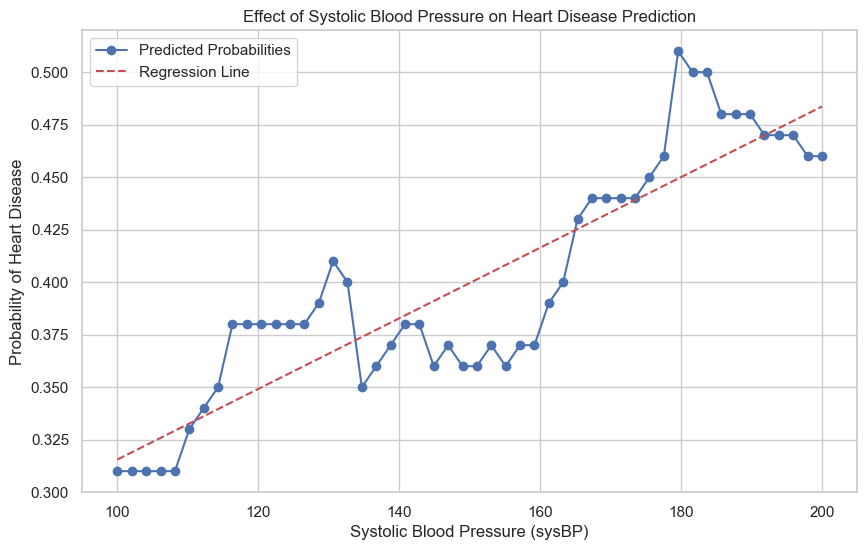

In [105]:
import numpy as np
import matplotlib.pyplot as plt

# Sample row with raw data
sample_data = {
    'age': 50,
    'cigsPerDay': 20,
    'totChol': None,
    'sysBP': None,
    'diaBP': None,
    'BMI': 28.0,
    'heartRate': None,
    'glucose': 85,
    'male': 1,  # Assume 1 for male, 0 for female
    'education': 2,  # Example: 1 for high school, 2 for college, etc.
    'currentSmoker': 1,  # 1 if the person is a smoker
    'BPMeds': 0,  # 0 if not on blood pressure medication
    'prevalentStroke': 0,  # 0 if no history of stroke
    'prevalentHyp': 1,  # 1 if hypertensive
    'diabetes': 0  # 0 if not diabetic
}

# Range of systolic blood pressure values to test
sysBP_values = np.linspace(100, 200, 50)  # From 100 to 200 in 50 steps
probabilities = []

for sysBP in sysBP_values:
    test_sample = sample_data.copy()
    test_sample['sysBP'] = sysBP
    test_df = pd.DataFrame([test_sample])
    test_preprocessed = preprocessor.transform(test_df)
    test_preprocessed_df = pd.DataFrame(test_preprocessed, columns=feature_names)
    prob = models['Random Forest'].predict_proba(test_preprocessed_df)[:, 1]
    probabilities.append(prob[0])

# Compute the coefficients for the linear regression line
coefficients = np.polyfit(sysBP_values, probabilities, 1)  # 1 indicates linear
regression_line = np.polyval(coefficients, sysBP_values)

display(test_preprocessed_df)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(sysBP_values, probabilities, marker='o', linestyle='-', color='b', label='Predicted Probabilities')
plt.plot(sysBP_values, regression_line, 'r--', label='Regression Line')  # Add the regression line in red
plt.title('Effect of Systolic Blood Pressure on Heart Disease Prediction')
plt.xlabel('Systolic Blood Pressure (sysBP)')
plt.ylabel('Probability of Heart Disease')
plt.grid(True)
plt.legend()
plt.show()
